In [39]:
import pandas as pd 
import numpy as np

In [40]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset, random_split
from torchvision import datasets
from torchvision.transforms import ToTensor

In [41]:
import os
import numpy as np
import pandas as pd
from PIL import Image

def create_image_dataframe(image_directory,strr):
    image_files = os.listdir(image_directory)

    image_data = []
    class_names = []

    for file_name in image_files:
        file_path = os.path.join(image_directory, file_name)
        if os.path.isfile(file_path):
            image = Image.open(file_path)

            # Convert the image to a NumPy array
            image_array = np.array(image)
            label = strr  
            image_data.append(image_array)
            class_names.append(label)

    # Create a DataFrame from the image data and labels
    df = pd.DataFrame({"image": image_data, "label": class_names})

    return df



In [42]:
df_Early = create_image_dataframe("/kaggle/input/potato-plant-diseases-data/PotatoPlants/Potato___Early_blight","Early")
df_Early

,image,label
0,"[[[194, 191, 198], [194, 191, 198], [193, 190,...",Early
1,"[[[137, 134, 151], [119, 116, 133], [152, 149,...",Early
2,"[[[127, 116, 120], [151, 140, 144], [146, 135,...",Early
3,"[[[138, 135, 146], [139, 136, 147], [137, 134,...",Early
4,"[[[142, 140, 154], [143, 141, 155], [147, 145,...",Early
...,...,...
995,"[[[134, 132, 143], [144, 142, 153], [174, 172,...",Early
996,"[[[164, 162, 176], [165, 163, 177], [166, 164,...",Early
997,"[[[175, 172, 189], [171, 168, 185], [169, 166,...",Early
998,"[[[192, 187, 193], [187, 182, 188], [186, 181,...",Early


In [43]:
df_Late = create_image_dataframe("/kaggle/input/potato-plant-diseases-data/PotatoPlants/Potato___Late_blight","Late")
df_Late

,image,label
0,"[[[137, 121, 132], [136, 120, 131], [135, 119,...",Late
1,"[[[185, 178, 185], [184, 177, 184], [185, 178,...",Late
2,"[[[120, 113, 121], [108, 101, 109], [103, 96, ...",Late
3,"[[[142, 130, 144], [141, 129, 143], [138, 126,...",Late
4,"[[[200, 184, 184], [188, 172, 172], [184, 168,...",Late
...,...,...
995,"[[[187, 174, 181], [187, 174, 181], [179, 166,...",Late
996,"[[[206, 192, 191], [203, 189, 188], [205, 191,...",Late
997,"[[[179, 164, 171], [158, 143, 150], [157, 142,...",Late
998,"[[[198, 187, 191], [196, 185, 189], [194, 183,...",Late


In [44]:
df_healthy = create_image_dataframe("/kaggle/input/potato-plant-diseases-data/PotatoPlants/Potato___healthy","healthy")
df_healthy

,image,label
0,"[[[172, 151, 156], [173, 152, 157], [167, 146,...",healthy
1,"[[[169, 149, 160], [161, 141, 152], [149, 129,...",healthy
2,"[[[142, 127, 132], [111, 96, 101], [137, 122, ...",healthy
3,"[[[161, 142, 146], [171, 152, 156], [171, 152,...",healthy
4,"[[[188, 182, 182], [189, 183, 183], [192, 186,...",healthy
...,...,...
147,"[[[157, 138, 144], [162, 143, 149], [154, 135,...",healthy
148,"[[[190, 177, 186], [183, 170, 179], [174, 161,...",healthy
149,"[[[165, 148, 156], [167, 150, 158], [150, 133,...",healthy
150,"[[[155, 136, 140], [163, 144, 148], [137, 118,...",healthy


In [45]:
import pandas as pd
from sklearn.utils import shuffle
combined_df = pd.concat([df_Early, df_Late, df_healthy])
df = shuffle(combined_df)
df

,image,label
707,"[[[147, 132, 135], [148, 133, 136], [140, 125,...",Late
243,"[[[115, 103, 107], [115, 103, 107], [105, 93, ...",Late
96,"[[[159, 151, 164], [160, 152, 165], [162, 154,...",Late
435,"[[[153, 150, 159], [109, 106, 115], [107, 104,...",Early
116,"[[[148, 136, 146], [156, 144, 154], [147, 135,...",Late
...,...,...
535,"[[[125, 112, 122], [114, 101, 111], [110, 97, ...",Late
156,"[[[114, 112, 123], [106, 104, 115], [116, 114,...",Early
640,"[[[179, 175, 189], [174, 170, 184], [175, 171,...",Late
100,"[[[145, 129, 139], [160, 144, 154], [161, 145,...",healthy


In [46]:
from sklearn.model_selection import train_test_split

train_dataset, test_dataset = train_test_split(df, test_size=0.2, random_state=42)

In [47]:
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor, Normalize
from torchvision import transforms


class CustomDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.data = dataframe
        self.transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) #mean-std range: -1,1
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        image = self.data.iloc[idx]['image']
        label = self.data.iloc[idx]['label']
        
        if self.transform is not None:
            image = self.transform(image)
        
        return image, label

In [48]:
train = CustomDataset(train_dataset)
train_dataloader = DataLoader(train, batch_size=32, shuffle=True)

In [49]:
test = CustomDataset(test_dataset)
test_dataloader = DataLoader(test, batch_size=32, shuffle=True)

In [50]:
print(train_dataloader)
print(test_dataloader)

In [53]:
# Iterate over the train dataloader
for batch_idx, (images, labels) in enumerate(train_dataloader):
    print("Batch of images:", images[:5].shape)
    print("Batch of labels:", labels[:5])
    break  # Exit the loop after the first batch

Batch of images: torch.Size([5, 3, 256, 256])
Batch of labels: ('Late', 'Early', 'Late', 'Early', 'healthy')


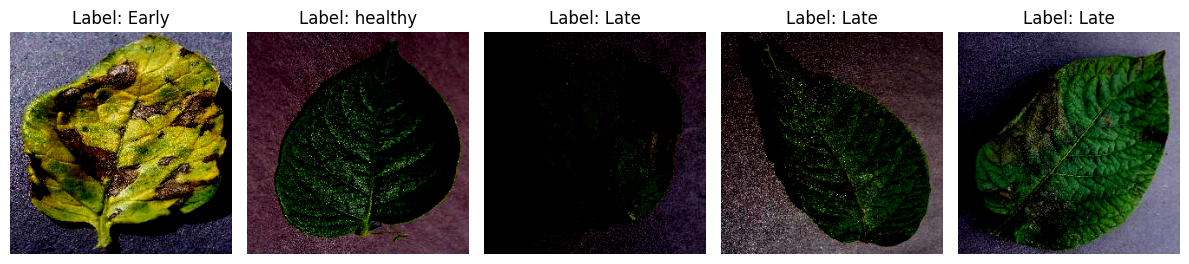

In [55]:
import matplotlib.pyplot as plt

num_images_to_visualize = 5
for batch_idx, (images, labels) in enumerate(train_dataloader):

    images_to_visualize = images[:num_images_to_visualize]
    labels_to_visualize = labels[:num_images_to_visualize]

    # Reshape images if needed (e.g., for grayscale images)
    if len(images_to_visualize.shape) == 4:
        images_to_visualize = images_to_visualize.squeeze(1)

    fig, axes = plt.subplots(1, num_images_to_visualize, figsize=(12, 3))
    for i, (image, label) in enumerate(zip(images_to_visualize, labels_to_visualize)):
        axes[i].imshow(image.permute(1, 2, 0))  # Transpose image dimensions if needed
        axes[i].set_title(f"Label: {label}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()
    break